# Project # 1 - EDA (Exploratory Data Analysis)

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv')
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21102,2867300190,20140528T000000,363000.0,4,2.50,3753,7204,2.0,0,0,...,10,3336.0,417,2008,0,98023,47.3011,-122.385,3494,9375
1443,1951820070,20140822T000000,491500.0,3,2.25,2230,13100,1.0,0,0,...,8,1510.0,720,1974,0,98006,47.5413,-122.174,2010,10650
9344,3738900035,20140825T000000,298800.0,2,1.00,860,8189,1.0,0,0,...,6,860.0,0,1948,0,98155,47.7350,-122.306,1180,8189
6781,985000950,20150227T000000,217000.0,2,1.00,770,9715,1.0,0,0,...,6,770.0,0,1942,0,98168,47.4924,-122.312,1140,9715
8816,7855400330,20140604T000000,1100000.0,5,2.75,2660,8737,1.0,0,4,...,8,1470.0,1190,1969,0,98006,47.5667,-122.155,3280,8783


In [3]:
# Para saber el total de los registros
# Me dice cuantos registros tenemos y cuantas columnas
df.shape

(21613, 21)

In [4]:
# Revisamos el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Ver las estadisticas de las columnas
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Se quitan tantos decimales de los campos que estan en flotante
pd.options.display.float_format = '{:.2f}'.format

In [6]:
# Se usa la opcion T en el describe para ver los datos transpuestos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


# Analisis de Univariables
  * Esto es un analisis independiente de las columnas que necesitan un analisis, con esto te puedes dar una idea de como estan los datos con los que vas a trabajar

In [7]:
# Total de casas analizadas
# Es el total de los registros que se estan analizando
# df["columna"].duplicated()

df.shape[0]

21613

In [8]:
# Total de zipcodes analizados
# La funcion unique nos devuelve un arreglo (por eso usamos la libreria numpy) y ya con el areglo devuelto lo ordenamos
array = df['price'].unique()
array.sort()
array

array([  75000.,   78000.,   80000., ..., 6885000., 7062500., 7700000.],
      shape=(4028,))

In [9]:
# Podemos ver cuantos son los datos unicos, por ejemplo cuantos zip codes tengo (porque la instruccion anterior solo me da los valores unicos, no asi el numero)
num_zipcodes = df['zipcode'].unique().__len__()
num_zipcodes

70

In [10]:
# Esta es para saber el valor unico de cada columna en todo el dataframe
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [11]:
# Esto es para saber todas las columnas que faltan del dataframe
print('Hay', df.isnull().sum().sum(), 'Valores Incompletos')

Hay 2 Valores Incompletos


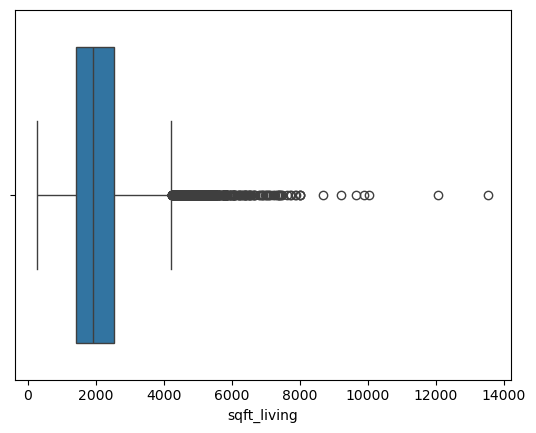

In [4]:
# Asi puedo ver la distribucion de los campos (pies cuadrados)
ax = sns.boxplot(x=df["sqft_living"])

# Analisis de correlacion

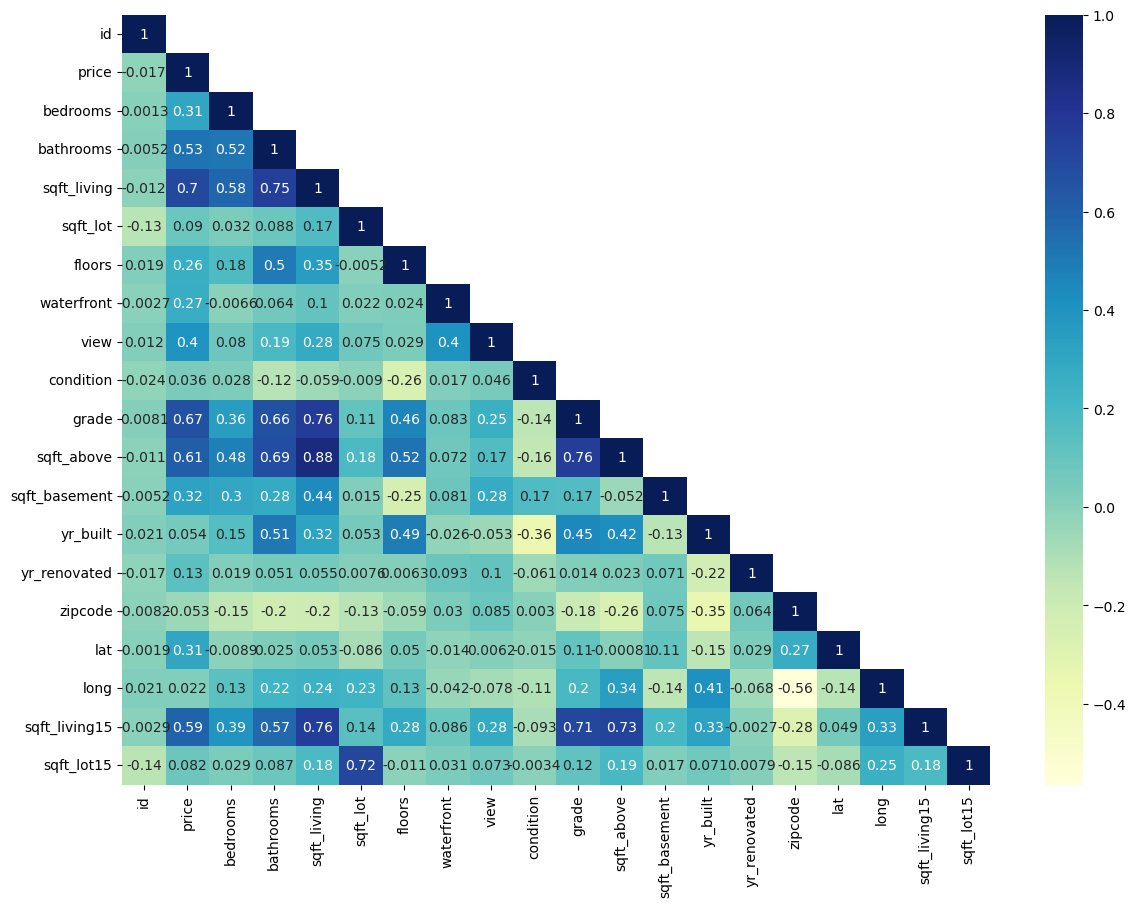

In [12]:
# Grafico de correlacion entre todas las variables
# Tuve que decirle que use solo las columnas numericas con el df.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))
corr_df = df.select_dtypes(include=[np.number]).corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap="YlGnBu", annot=True)

In [13]:
# Esto es para sacar la correlacion de pearson pero sin la grafica
df.select_dtypes(include=[np.number]).corr(method='pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


In [ ]:
#Visualizacion de columnas y numero de columnas
print('Lista de Columnas")
print("--------------------------------------------------------")
print(df.columns)
print(len(df.columns), " columns')

#Numero de columnas numericas
cols_num = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

Lista de Columnas
--------------------------------------------------------
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
21  columns


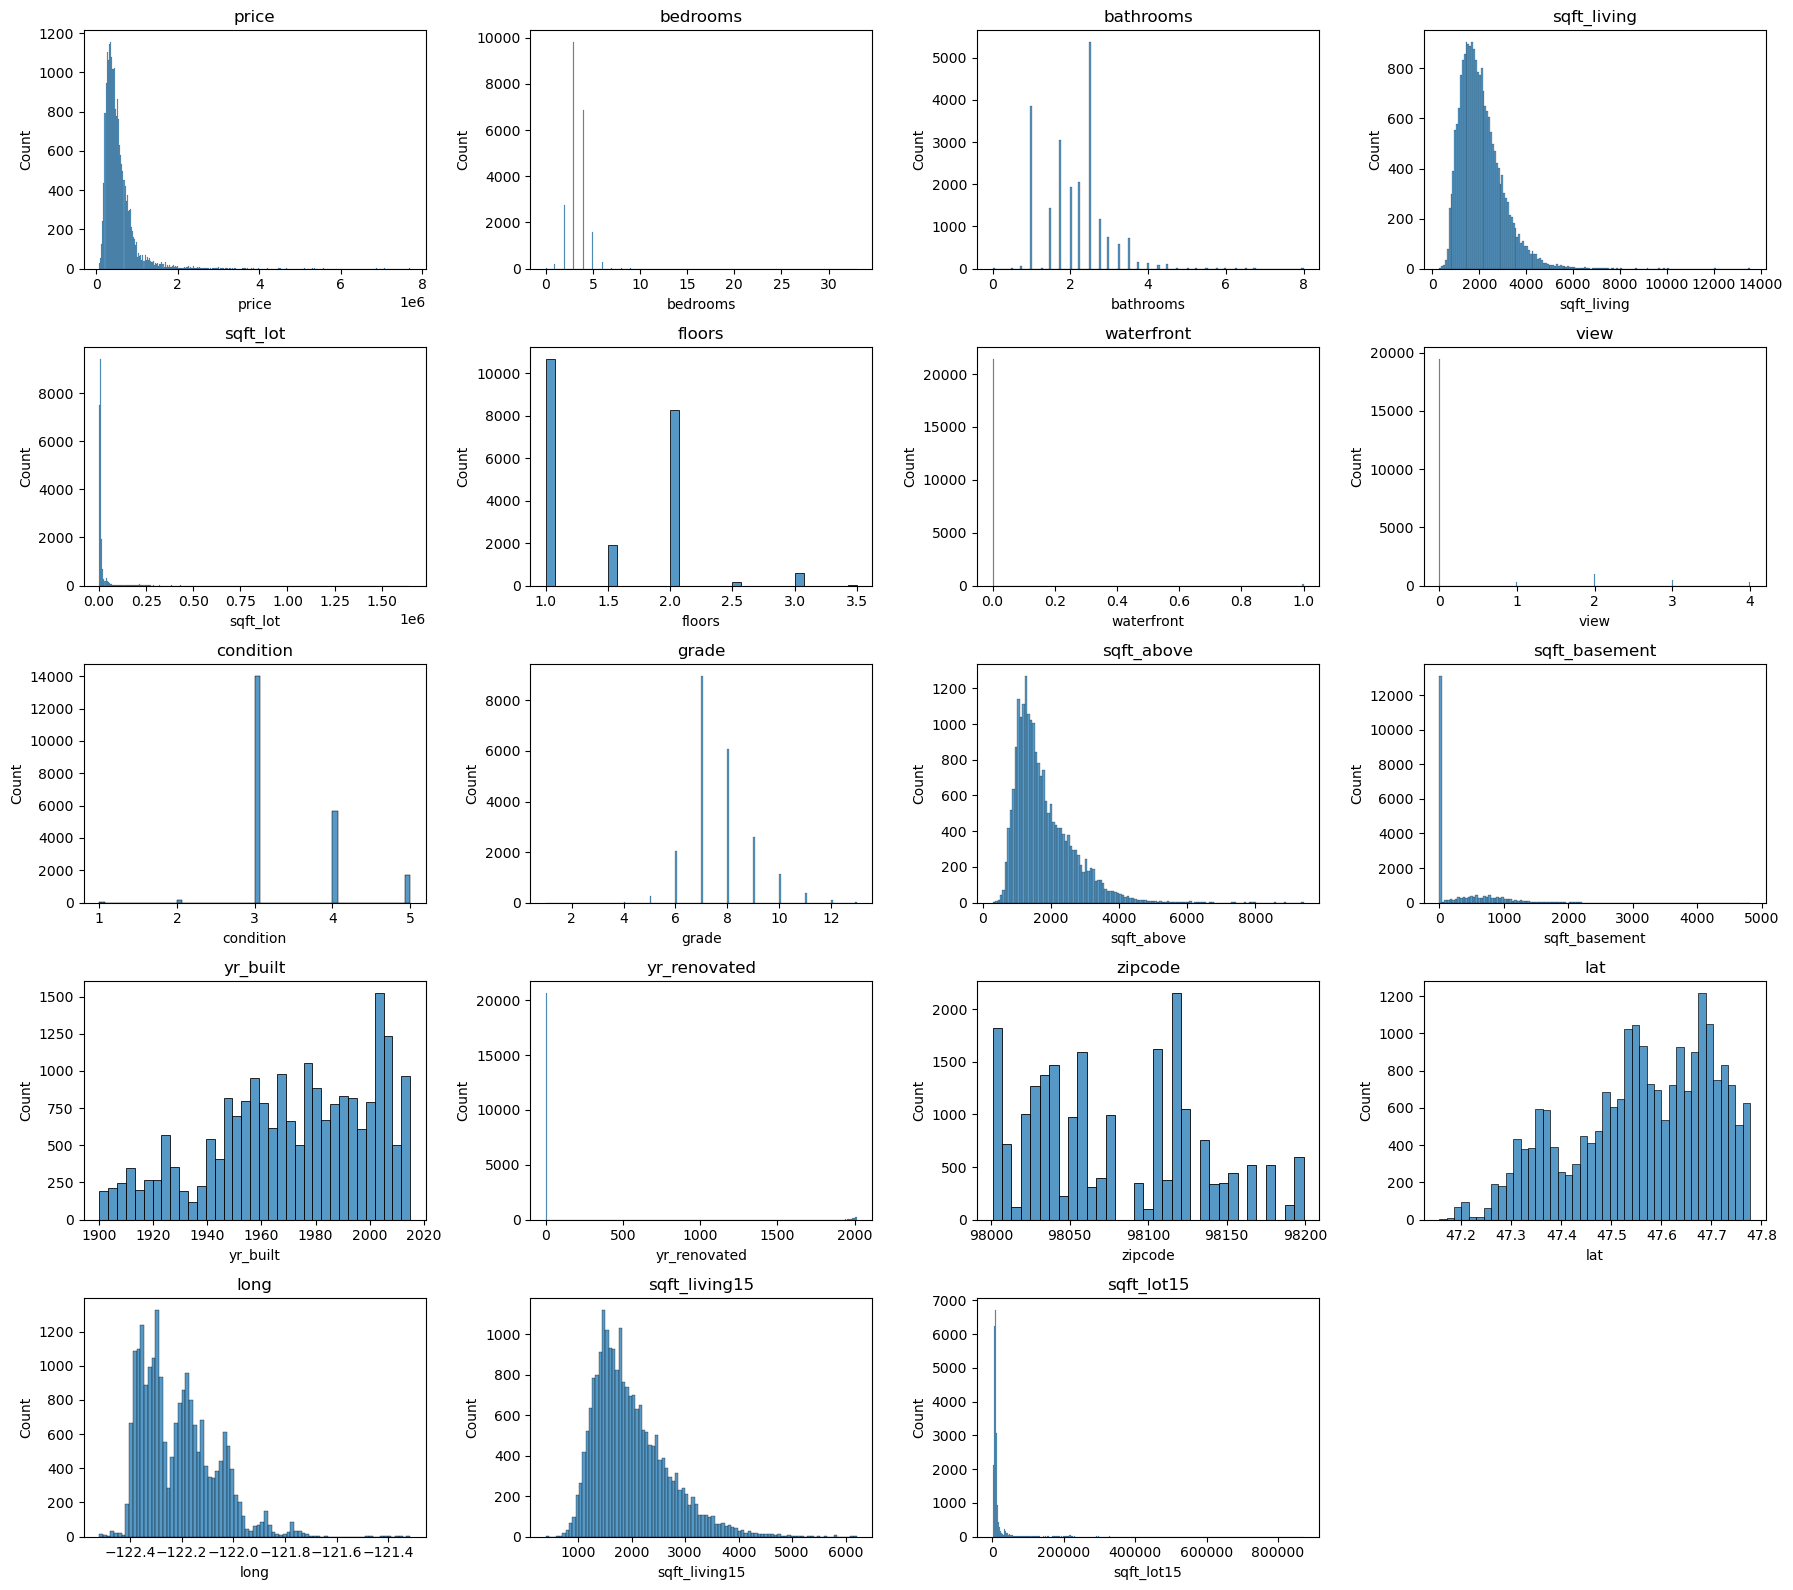

In [15]:
# Grafica exploratoria de todas las columnas
# Creamos la cuadrícula de 5x4 (20 espacios)
# 2. Creamos la figura
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18,16))
axes_flat = axes.flatten()

# 3. El bucle corregido
for i, column in enumerate(cols_num):
    # Verificamos que la columna exista realmente en el DataFrame
    if column in df.columns:
        sns.histplot(data=df, x=column, ax=axes_flat[i], kde=False)
        axes_flat[i].set_title(column)
    else:
        print(f"Advertencia: La columna '{column}' no existe en el DataFrame")

# 4. Limpieza de cuadros vacíos
for j in range(len(cols_num), len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

# Agrupamiento

In [16]:
# Se usa el agrupamiento para darle mas peso a los datos,por ejemplo aca se esta agrupando si la casa tiene vista a lago o no
df.groupby(['waterfront']).median(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
waterfront,,,,,,,,,,,,,,,,,,,
0,3904935400.00,450000.00,3.00,2.25,1910.00,7588.50,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1830.00,7600.00
1,3761100045.00,1400000.00,3.00,2.50,2850.00,17342.00,2.00,4.00,3.00,9.00,2180.00,500.00,1960.00,0.00,98075.00,47.54,-122.28,2660.00,15959.00


In [17]:
# Agrupamiento por pisos
df.groupby(['floors']).median(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
floors,,,,,,,,,,,,,,,,,,,
1.00,3884800600.50,390000.00,3.00,1.75,1630.00,8337.00,0.00,0.00,3.00,7.00,1260.00,200.00,1962.00,0.00,98070.00,47.56,-122.27,1680.00,8173.50
1.50,3856904632.50,524475.00,3.00,1.75,1760.00,5962.50,0.00,0.00,4.00,7.00,1530.00,0.00,1928.00,0.00,98115.00,47.63,-122.31,1660.00,5700.00
2.00,3982700125.00,542950.00,4.00,2.50,2440.00,7089.00,0.00,0.00,3.00,8.00,2311.00,0.00,1998.00,0.00,98055.00,47.56,-122.17,2260.00,7113.00
2.50,3751601877.00,799200.00,4.00,2.50,2850.00,5474.00,0.00,0.00,3.00,9.00,2710.00,60.00,1977.00,0.00,98106.00,47.62,-122.30,2240.00,5352.00
3.00,3448000410.00,490000.00,3.00,2.50,1500.00,1323.00,0.00,0.00,3.00,8.00,1480.00,0.00,2007.00,0.00,98109.00,47.67,-122.35,1470.00,1466.00
3.50,1972201219.00,534500.00,3.00,2.62,1730.00,1331.00,0.00,0.00,3.00,8.00,1730.00,0.00,2005.50,0.00,98104.00,47.65,-122.33,1405.00,1331.00


<Axes: xlabel='floors'>

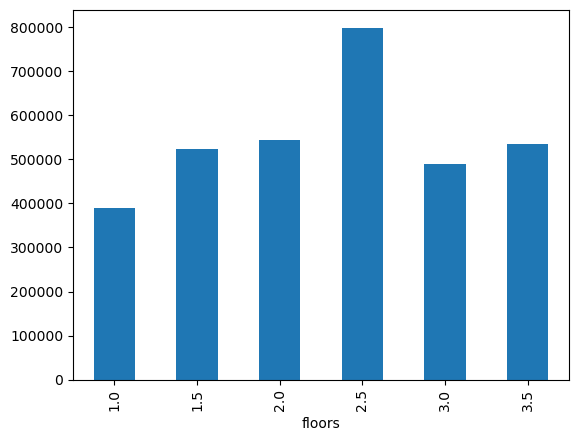

In [21]:
# Analisis rapido
# Grafico de percio por pisos
df.groupby(["floors"]).median(numeric_only=True)['price'].plot.bar()

<Axes: xlabel='yr_built'>

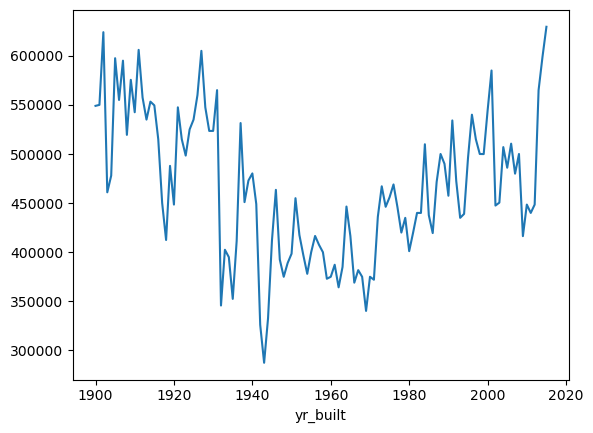

In [22]:
# Analisis del precio por a;o de construccion
df.groupby(["yr_built"]).median(numeric_only=True)['price'].plot.line()


<Axes: xlabel='zipcode'>

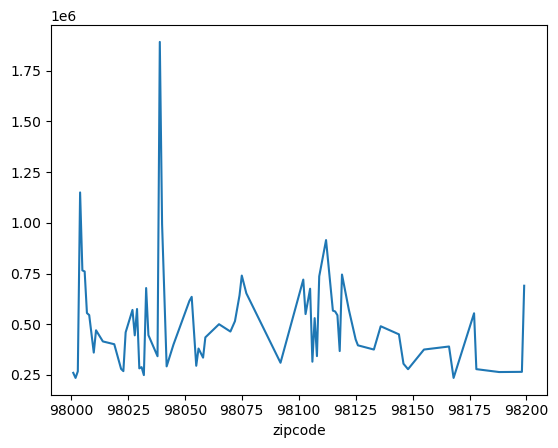

In [23]:
# Analisis del precio por zipcode de construccion
df.groupby(["zipcode"]).median(numeric_only=True)['price'].plot.line()

In [24]:
# Ahrupamiento general por varibales: bedrooms
df.groupby(["bedrooms"]).median(numeric_only=True)

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,
0,3918400017.00,288000.00,0.00,1470.00,5900.00,2.00,0.00,0.00,3.00,7.00,1470.00,0.00,1990.00,0.00,98065.00,47.53,-122.17,1810.00,7200.00
1,3340401535.00,299000.00,1.00,780.00,5750.00,1.00,0.00,0.00,3.00,6.00,760.00,0.00,1940.00,0.00,98116.00,47.56,-122.31,1360.00,5650.00
2,3904100050.00,374000.00,1.00,1140.00,5244.00,1.00,0.00,0.00,3.00,7.00,1010.00,0.00,1948.00,0.00,98116.00,47.60,-122.32,1430.00,5400.00
3,3856904795.00,413000.00,2.00,1680.00,7629.50,1.00,0.00,0.00,3.00,7.00,1440.00,0.00,1976.00,0.00,98059.00,47.57,-122.23,1720.00,7688.50
4,4029950105.00,549997.50,2.50,2410.00,8100.00,2.00,0.00,0.00,3.00,8.00,2080.00,0.00,1980.00,0.00,98056.00,47.57,-122.19,2190.00,8000.00
5,4036400040.00,620000.00,2.75,2870.00,8925.00,2.00,0.00,0.00,3.00,8.00,2190.00,700.00,1975.00,0.00,98056.00,47.58,-122.21,2280.00,8550.00
6,3876050645.00,650000.00,3.00,2955.00,8696.00,2.00,0.00,0.00,3.00,8.00,2340.00,885.00,1966.00,0.00,98097.00,47.60,-122.27,2095.00,8241.00
7,3618729798.00,728580.00,3.50,3335.00,8836.00,2.00,0.00,0.00,3.00,8.00,2820.00,750.00,1964.50,0.00,98104.00,47.62,-122.28,2215.00,8088.00
8,3756900027.00,700000.00,3.25,3840.00,7500.00,2.00,0.00,0.00,3.00,8.00,2530.00,1300.00,1962.00,0.00,98105.00,47.63,-122.30,1780.00,7624.00


# Analisis Bivariado
 * Se hace utilizando la funcion crosstab que compara 2 variables en los ejes de X y las Y.

In [16]:
# Analisis bivariado de Pisos con Waterfront
# Para entender la data
# Esto me dice cuantas casas tengo con los pisos correspondientes (1, 1.50, 2.0 etc) y cuantas estan frente a un lago
pd.crosstab(df['waterfront'], df['floors'])

floors,1.00,1.50,2.00,2.50,3.00,3.50
waterfront,,,,,,
0,10623,1889,8166,159,605,8
1,57,21,75,2,8,0


In [17]:
# Porcentajes horizontales
pd.crosstab(df['waterfront'], df['floors'], normalize='index')

floors,1.00,1.50,2.00,2.50,3.00,3.50
waterfront,,,,,,
0,0.50,0.09,0.38,0.01,0.03,0.00
1,0.35,0.13,0.46,0.01,0.05,0.00


<Axes: xlabel='waterfront'>

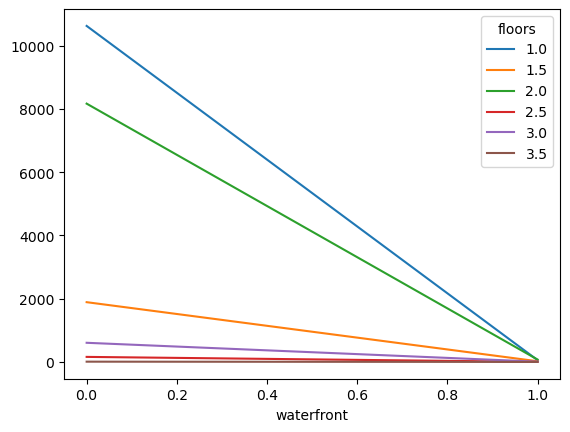

In [32]:
# Esta es la grafcia de lo anterior
pd.crosstab(df['waterfront'], df['floors']).plot()

<Axes: xlabel='grade'>

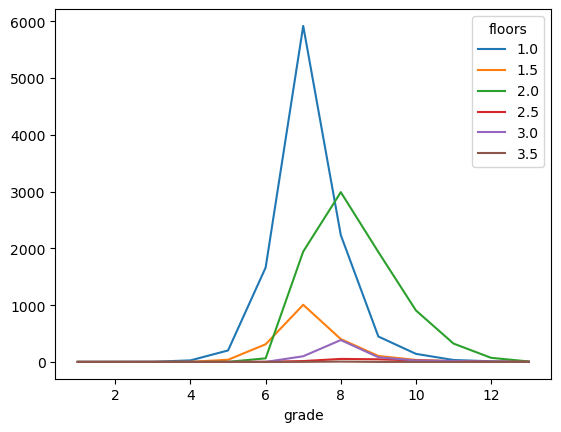

In [18]:
# Otra Grafica podria ser
pd.crosstab(df['grade'], df['floors']).plot()

In [19]:
# Desgloce de los dartos segun pisos y score de la casa
pd.crosstab(df['grade'], df['floors'], margins=True, margins_name='Total')

floors,1.00,1.50,2.00,2.50,3.00,3.50,Total
grade,,,,,,,
1,1,0,0,0,0,0,1
3,3,0,0,0,0,0,3
4,27,2,0,0,0,0,29
5,202,38,2,0,0,0,242
6,1662,311,63,2,0,0,2038
7,5916,1006,1943,15,100,1,8981
8,2233,402,2989,53,385,6,6068
9,447,105,1935,46,82,0,2615
10,142,35,906,26,25,0,1134


In [20]:
# Se puede ver el precio promedio segun el grade y los pisos
dfct1 = pd.crosstab(df['grade'], df['floors'], values=df.price, aggfunc='mean', margins=True, margins_name='Total')
dfct1 = dfct1.replace(np.nan, 0)

In [37]:
dfct1

floors,1.00,1.50,2.00,2.50,3.00,3.50,Total
grade,,,,,,,
1,142000.00,0.00,0.00,0.00,0.00,0.00,142000.00
3,205666.67,0.00,0.00,0.00,0.00,0.00,205666.67
4,216187.04,190000.00,0.00,0.00,0.00,0.00,214381.03
5,244425.53,270364.32,247500.00,0.00,0.00,0.00,248523.97
6,294411.45,341526.30,302590.71,361250.00,0.00,0.00,301919.64
7,390574.93,503890.61,386962.93,516613.27,373947.39,1095000.00,402590.26
8,552791.38,696781.78,519103.51,643799.36,495449.12,511916.67,542852.77
9,856428.37,950667.83,740172.50,940176.52,787944.76,0.00,773513.19
10,1161105.12,1271418.57,1033278.10,1537926.92,1195030.60,0.00,1071771.07


In [21]:
dfct1.style.background_gradient(cmap='Greens')
#\.set_properties(**{'font-size: '10px'})

floors,1.000000,1.500000,2.000000,2.500000,3.000000,3.500000,Total
grade,,,,,,,
1,142000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142000.000000
3,205666.666667,0.000000,0.000000,0.000000,0.000000,0.000000,205666.666667
4,216187.037037,190000.000000,0.000000,0.000000,0.000000,0.000000,214381.034483
5,244425.529703,270364.315789,247500.000000,0.000000,0.000000,0.000000,248523.971074
6,294411.447653,341526.302251,302590.714286,361250.000000,0.000000,0.000000,301919.637390
7,390574.927485,503890.614314,386962.933093,516613.266667,373947.390000,1095000.000000,402590.262332
8,552791.376623,696781.776119,519103.507862,643799.358491,495449.124675,511916.666667,542852.765656
9,856428.369128,950667.828571,740172.500258,940176.521739,787944.756098,0.000000,773513.185851
10,1161105.119718,1271418.571429,1033278.097130,1537926.923077,1195030.600000,0.000000,1071771.074074


# Descubrimientos (insights)

In [22]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10939,2877101821,20140805T000000,500000.00,3,1.00,1220,3400,1.00,0,0,...,7,1060.00,160,1927,0,98117,47.68,-122.36,1350,3750
47,4178300310,20140716T000000,785000.00,4,2.50,2290,13416,2.00,0,0,...,9,2290.00,0,1981,0,98007,47.62,-122.15,2680,13685
863,1937300270,20150303T000000,910000.00,3,3.50,2480,3200,2.00,0,0,...,10,2480.00,0,2010,0,98144,47.60,-122.31,1980,3200
12747,8821900155,20140709T000000,335500.00,3,1.00,1370,6780,2.00,0,0,...,6,1370.00,0,1930,0,98125,47.72,-122.29,1450,7214
19379,2768100205,20140625T000000,519000.00,4,2.50,1950,2617,1.50,0,0,...,7,1250.00,700,1910,0,98107,47.67,-122.37,1520,1438


In [26]:
#Numero de casas por a;o de construccion
df.groupby("yr_built")["yr_built"].count().tail(10)

yr_built
2006    454
2007    417
2008    367
2009    230
2010    143
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, dtype: int64

<Axes: xlabel='yr_built'>

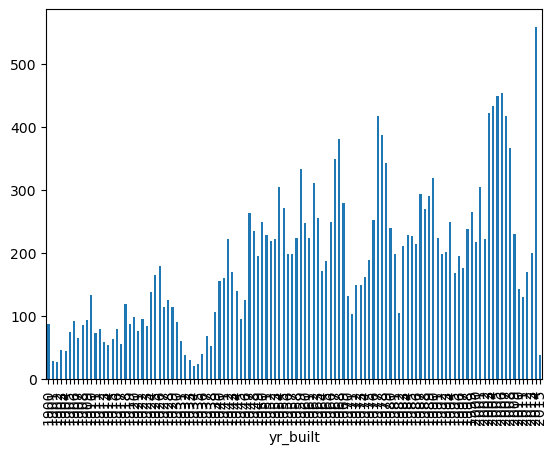

In [32]:
#Graficamos estos datos
#year_2010 = df(df['yr_built'] > 2010)
df.groupby("yr_built")["yr_built"].count().plot.bar()

In [35]:
#A;o y condicion promedio
df.groupby('yr_built')['price'].mean()

yr_built
1900   581387.21
1901   556935.93
1902   673007.41
1903   480958.20
1904   583756.64
          ...   
2011   544522.00
2012   527447.34
2013   678545.45
2014   683681.75
2015   759785.16
Name: price, Length: 116, dtype: float64

<Axes: xlabel='yr_built'>

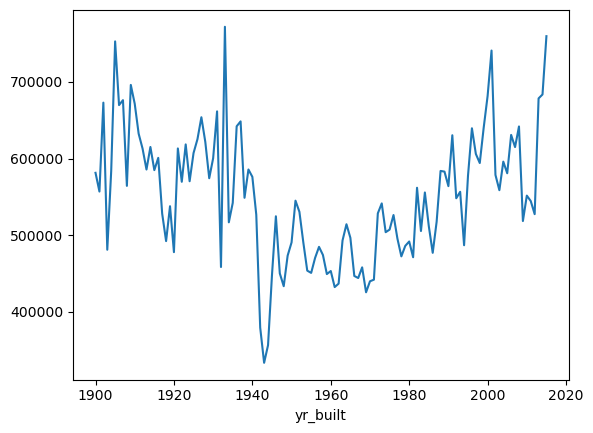

In [36]:
#A;o y condicion promedio
df.groupby('yr_built')['price'].mean().plot()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [42]:
#Tabla resumen de muchas cosas
df.groupby("yr_built")[["floors", "sqft_living", "sqft_lot", "price", "grade"]].mean()

,floors,sqft_living,sqft_lot,price,grade
yr_built,,,,,
1900,1.51,1732.01,10869.60,581387.21,6.87
1901,1.57,1763.62,4142.93,556935.93,7.03
1902,1.74,1919.63,4766.52,673007.41,7.44
1903,1.46,1507.74,6364.57,480958.20,6.87
1904,1.34,1603.18,5410.00,583756.64,6.91
...,...,...,...,...,...
2011,2.02,2313.68,6519.69,544522.00,8.18
2012,1.99,2378.74,6085.54,527447.34,8.18
2013,2.04,2636.59,7338.08,678545.45,8.47


In [46]:
# Filtre la informacion de arriba a aquellas casas construidas despues del 2010
filtered = df.query("yr_built > 2000")
filtered.groupby("yr_built")[["floors", "sqft_living", "sqft_lot", "price", "grade"]].mean()


,floors,sqft_living,sqft_lot,price,grade
yr_built,,,,,
2001,2.02,2880.71,19736.67,741030.80,8.65
2002,1.97,2600.15,23596.41,578638.75,8.22
2003,1.96,2458.55,12639.56,558694.26,8.05
2004,1.97,2537.37,14760.60,595998.75,8.23
2005,2.02,2403.05,10592.95,580811.29,8.26
2006,2.05,2531.80,15493.95,630880.07,8.49
2007,2.12,2320.65,9823.00,615004.56,8.33
2008,2.20,2246.04,10073.48,641903.79,8.32
2009,2.16,1977.52,9667.50,518442.62,8.00


<Axes: xlabel='yr_built'>

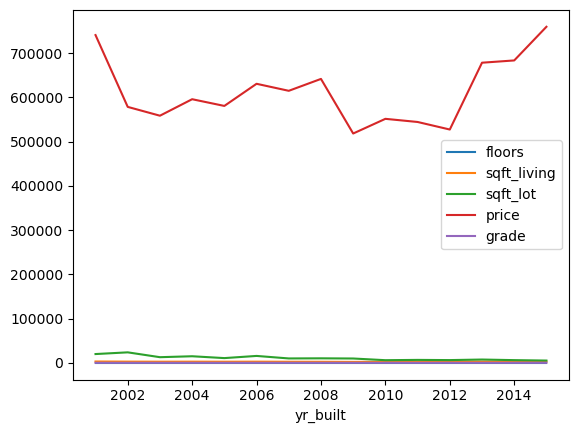

In [47]:
filtered.groupby("yr_built")[["floors", "sqft_living", "sqft_lot", "price", "grade"]].mean().plot()

<Axes: ylabel='zipcode'>

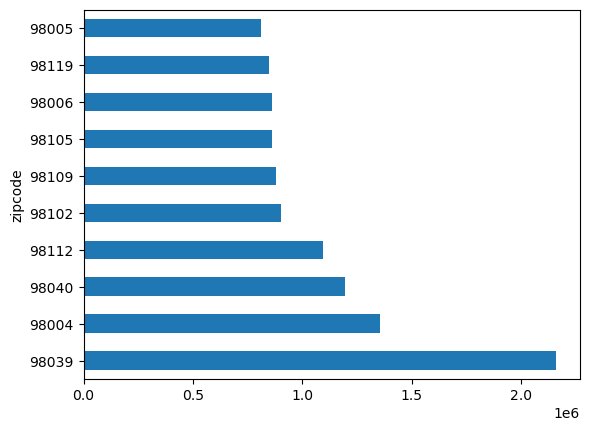

In [53]:
#Top 10 zipcodes con mayor preco promedio
#df.groupby("zipcode")["price"].mean()
# Se a;ade la condicion de ordenamiento sort_values
#df.groupby("zipcode")["price"].mean().sort_values(ascending=False)
#Sacar el top 10 de los zipcodes mas caros
#df.groupby("zipcode")["price"].mean().sort_values(ascending=False).head(10)
# Para sacar un top 5 o top 10 siempre se ordenan los valores en forma ascedente/descendente y se toma el head
df.groupby("zipcode")["price"].mean().sort_values(ascending=False).head(10).plot.barh()

<Axes: ylabel='zipcode'>

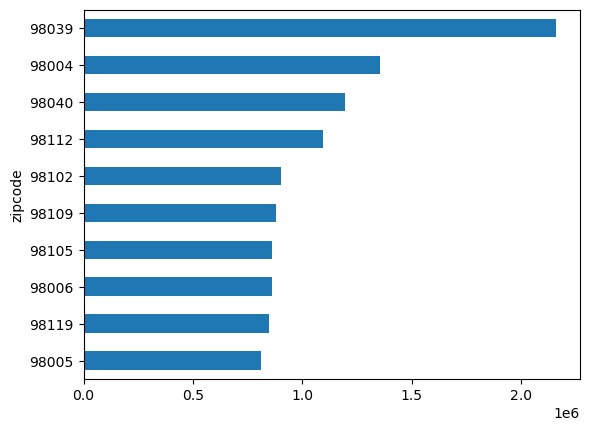

In [54]:
# Grafica de barras horizontales como un tordado (iloc le da la vuelta a los datos)
df.groupby("zipcode")["price"].mean().sort_values(ascending=False).head(10).iloc[::-1].plot.barh()

In [ ]:
# Top 10 zipcodes con mayor precio promedio
# desglosados si es que tienen o no vista a un lago o rio
# Trae los top 50 valores de todo el dataset
df2 = df.groupby(["zipcode", "waterfront"])["price"].mean().sort_values(ascending=False).head(50)

zipcode  waterfront
98004    1            7062500.00
98039    1            3640900.00
98033    1            3444950.00
98105    1            3051666.67
98040    1            2960416.67
98144    1            2750000.00
98008    1            2571666.67
98034    1            2481666.67
98027    1            2400000.00
98115    1            2300000.00
98056    1            2266666.67
98155    1            2159166.67
98039    0            2130396.53
98074    1            1997166.67
98075    1            1885600.00
98199    1            1875000.00
98116    1            1705000.00
98052    1            1683333.33
98028    1            1600000.00
98006    1            1575250.00
98118    1            1550112.50
98125    1            1537142.86
98136    1            1412800.00
98004    0            1337868.31
98177    1            1295000.00
98166    1            1207400.00
98040    0            1115732.84
98112    0            1095499.34
98146    1            1001281.25
98178    1             

In [58]:
df2.head()

zipcode  waterfront
98004    1            7062500.00
98039    1            3640900.00
98033    1            3444950.00
98105    1            3051666.67
98040    1            2960416.67
Name: price, dtype: float64

In [60]:
#Mueve las columnas del dataframe a 0 y 1 para mostrar si tiene waterfront
df2.unstack().head(10)

waterfront,0,1
zipcode,,
98004,1337868.31,7062500.00
98039,2130396.53,3640900.00
98033,779035.13,3444950.00
98105,833769.81,3051666.67
98040,1115732.84,2960416.67
98144,NaN,2750000.00
98008,NaN,2571666.67
98034,NaN,2481666.67
98027,NaN,2400000.00


In [61]:
#Agrupamiento por pisos
df3 = df.groupby(["zipcode", "floors"])["price"].mean().sort_values(ascending=False).head(100)

In [62]:
df3.unstack().head(10)

floors,1.00,1.50,2.00,2.50,3.00,3.50
zipcode,,,,,,
98112,827606.58,911528.88,1190472.75,1648095.24,908078.46,3300000.00
98008,NaN,763571.43,925086.67,2789000.00,NaN,NaN
98039,1526040.91,NaN,2659193.93,NaN,NaN,NaN
98033,NaN,707906.25,979655.62,2350000.00,NaN,NaN
98053,NaN,710625.00,732626.21,958333.33,2280000.00,NaN
98040,968852.84,1272253.57,1419608.39,1061880.00,2252666.67,NaN
98144,NaN,NaN,NaN,1846000.00,NaN,NaN
98102,NaN,758210.83,862671.86,1826312.00,739375.00,1095000.00
98004,1125796.78,1537089.29,1700077.57,NaN,781700.00,NaN


<Axes: xlabel='zipcode'>

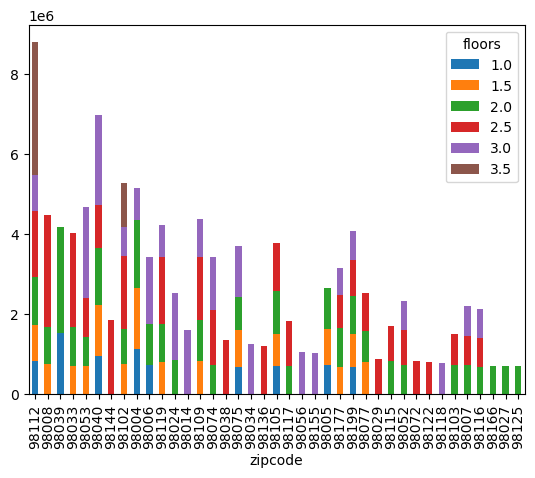

In [63]:
df3.unstack().plot.bar(stacked=True)